In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [15]:
data_train_path = r'C:\Users\lenov\Dataset Proyek 08\train'
data_test_path = r'C:\Users\lenov\Dataset Proyek 08\test'
data_val_path = r'C:\Users\lenov\Dataset Proyek 08\validation'

In [17]:
img_width = 180
img_height =180 

In [19]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 1514 files belonging to 5 classes.


In [21]:
data_cat = data_train.class_names

In [23]:
data_cat

['Apel Biasa', 'Apel Hijau', 'Apel Merah', 'pir bulat', 'pir lonjong']

In [25]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 293 files belonging to 5 classes.


In [27]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 360 files belonging to 5 classes.


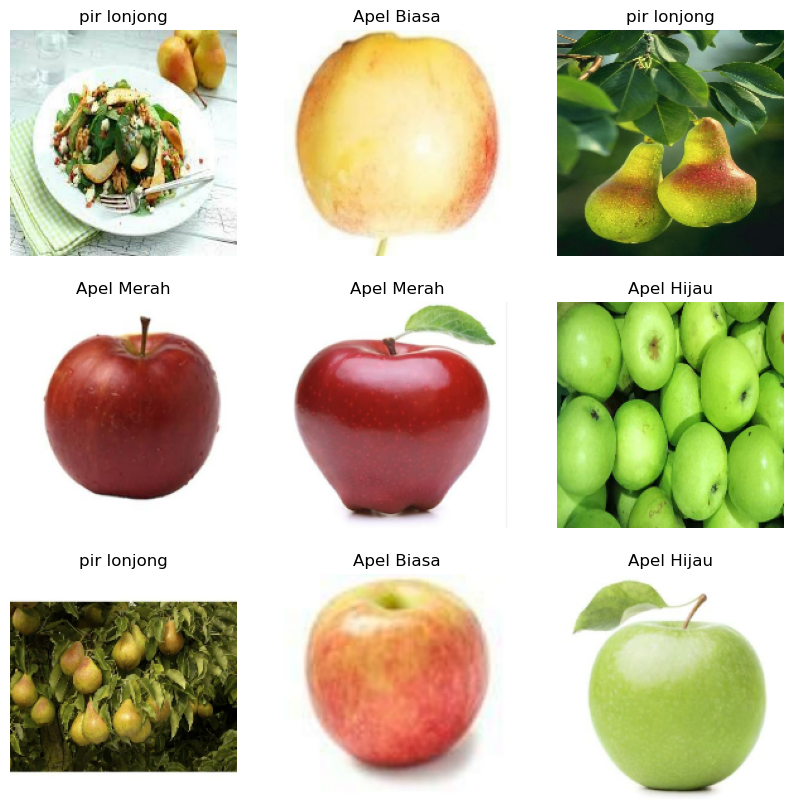

In [33]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [35]:
from tensorflow.keras.models import Sequential

In [37]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [55]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [57]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [59]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 15s 216ms/step - accuracy: 0.5951 - loss: 1.8729 - val_accuracy: 0.6143 - val_loss: 0.9276
Epoch 2/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 211ms/step - accuracy: 0.8439 - loss: 0.4465 - val_accuracy: 0.7713 - val_loss: 0.6546
Epoch 3/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 214ms/step - accuracy: 0.8858 - loss: 0.3404 - val_accuracy: 0.8259 - val_loss: 0.4394
Epoch 4/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 19s 395ms/step - accuracy: 0.9045 - loss: 0.2815 - val_accuracy: 0.9181 - val_loss: 0.2661
Epoch 5/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 21s 433ms/step - accuracy: 0.9181 - loss: 0.2257 - val_accuracy: 0.9249 - val_loss: 0.1995
Epoch 6/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 23s 478ms/step - accuracy: 0.9420 - loss: 0.1613 - val_accuracy: 0.8737 - val_loss: 0.3138
Epoch 7/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 18s 366ms/step - accuracy: 0.9590 - loss: 0.1295 - val_accuracy: 0.9147 - val_loss: 0.3268
Epoch 8/25
48/48 ━━━━━━━━━━━━━━━━━━━━ 16s 327ms/step - accuracy: 0.9506 - loss: 0.1274 - val_accu

Text(0.5, 1.0, 'Loss')

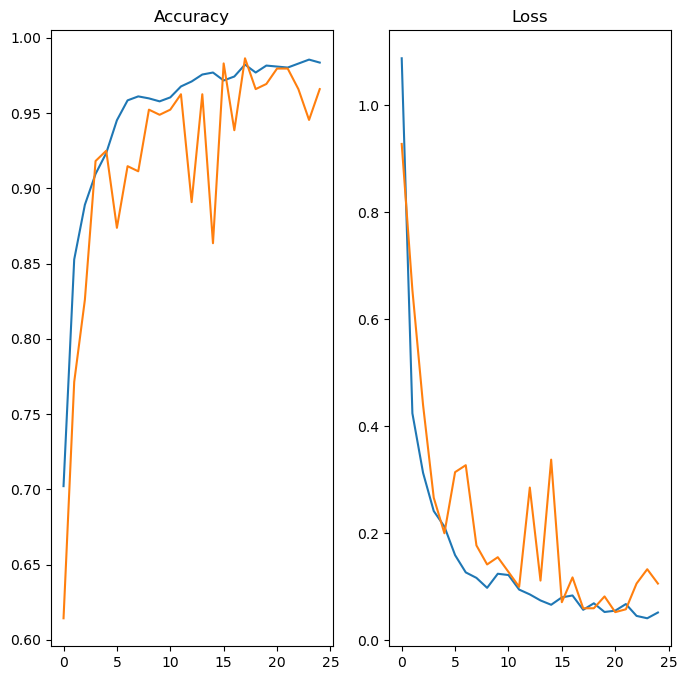

In [61]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [63]:
image = 'contoh.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [65]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


In [67]:
score = tf.nn.softmax(predict)

In [69]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is Apel Merah with accuracy of 68.46


In [71]:
model.save('Image_classify.h5')